### 准备数据
准备我们需要的数据，一般来说，经历了一轮牛熊周期的历史估值更具比较意义，所以，这里以上证指数2013年到目前为止的行情数据为例进行演示，同时，采用滚动市盈率为估值指标。数据来源为tushare。

In [1]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os

# 获取配置好的Token, TUSHARE积分不够放弃
token = os.getenv('TUSHARE_TOKEN')

print(token)

e2822994ae3775a5438c07b83f5ebbc4c057d0a0f2dc9e97d7d46d99


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import baostock as bs
import pandas as pd
from datetime import *
%matplotlib inline
#设置显示中文
plt.rcParams['font.sans-serif'] = 'FangSong'



#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)


code = "SH.000001"
#### 获取沪深A股估值指标(日频)数据 ####
# peTTM    滚动市盈率
# psTTM    滚动市销率
# pcfNcfTTM    滚动市现率
# pbMRQ    市净率
rs = bs.query_history_k_data_plus(code,
    "date,code,close,peTTM,pbMRQ,psTTM,pcfNcfTTM",
    start_date='2015-01-01', end_date='2017-12-31', 
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)


#### 打印结果集 ####
result_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    result_list.append(rs.get_row_data())
result = pd.DataFrame(result_list, columns=rs.fields)


result.head(5)

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


,date,code,close,peTTM,pbMRQ,psTTM,pcfNcfTTM
0,2015-01-05,sh.000001,3350.5190,,,,
1,2015-01-06,sh.000001,3351.4460,,,,
2,2015-01-07,sh.000001,3373.9540,,,,
3,2015-01-08,sh.000001,3293.4560,,,,
4,2015-01-09,sh.000001,3285.4120,,,,


findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sans-serif' not found because none of the following families were found: FangSong
findfont: Generic family 'sa

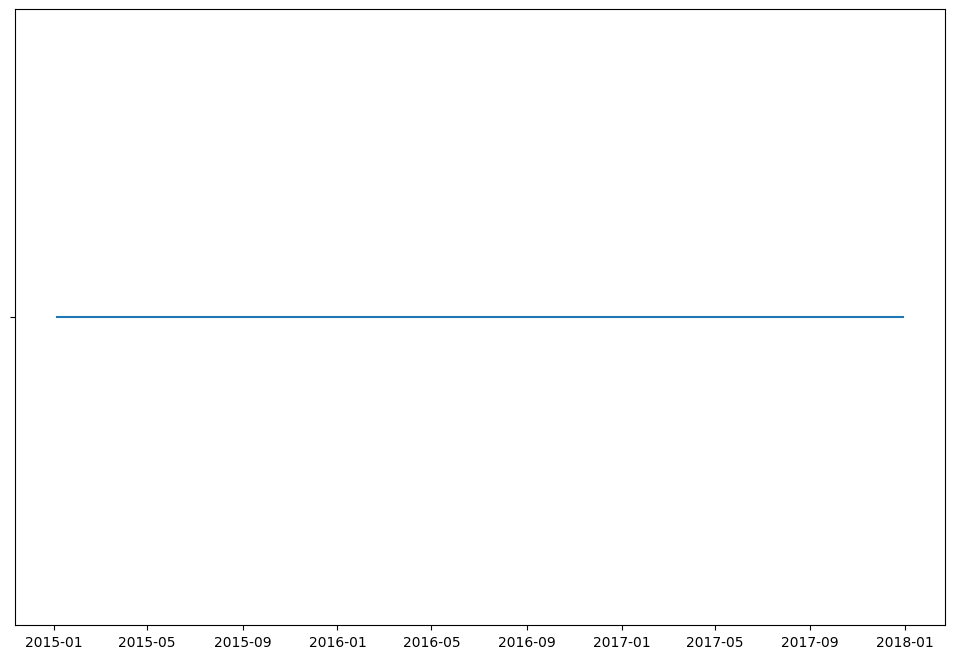

In [12]:
x = pd.to_datetime(result["date"]).values
y = result["peTTM"].values

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,y)